# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

In [3]:
x_img_train.shape

(50000, 32, 32, 3)

In [4]:
y_label_train.shape

(50000, 1)

In [5]:
x_img_test.shape

(10000, 32, 32, 3)

In [6]:
y_label_test.shape

(10000, 1)

In [7]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+':['+ str(labels[i][0]) + ']'  # TAG
        
#        title=str(i)+','+label_dict[labels[i][0]]
#        if len(prediction)>0:
#            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);
        ax.set_yticks([]);        
        idx+=1 
    plt.show()

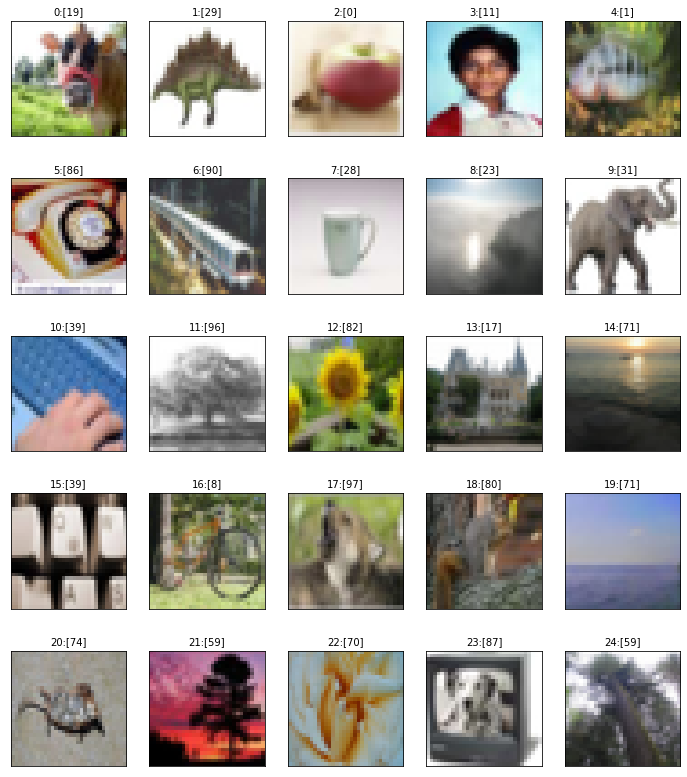

In [8]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0, 25)

# Image normalize 

In [9]:
x_img_train[0][31][31]

array([138, 173,  79], dtype=uint8)

In [10]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [11]:
x_img_train_normalize[0][31][31]

array([0.5411765 , 0.6784314 , 0.30980393], dtype=float32)

# 轉換label 為OneHot Encoding

In [12]:
y_label_train.shape

(50000, 1)

In [13]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [14]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [15]:
y_label_train_OneHot.shape

(50000, 100)

In [16]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.